In [2]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
np.random.seed(23)

# Table of Contents
1. Data Import
2. Checking Basic Information about the Dataset
3. Splitting the Dataset into Training (for modelers) and Validation (for validators) sets, and further splitting the training set into subsets for training, validation, and testing
4. Analysis of Values and Dependencies in the Dataset
5. Conclusion

# 1. Data Import

In [3]:
mobile_df = pd.read_csv('C:/Users/natal/phonePrices-1/Data/mobile.csv')
mobile_df.head(10) 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


#### About dataset:
This dataset consists of 21 columns describing phones features and 2000 records.

**Columns descriptions:**
- *battery_power* - total energy a battery can store in one time measured in mAh
- *blue* - has bluetooth or not
- *clock_speed* - speed at which microprocessor executes instructions
- *dual_sim* - has dual sim support or not
- *fc* - front camera mega pixels
- *four_g* - has 4G or not
- *int_memory* - internal memory in gigabytes
- *m_dep* - mobile depth in cm
- *mobile_wt* - weight of mobile phone
- *n_cores* - number of cores of processor
- *pc* - primary camera mega pixels
- *px_height* - pixel resolution height
- *px_width* - pixel resolution width
- *ram* - Random Access Memory in megabytes
- *sc_h* - screen height of mobile in cm
- *sc_w*- screen width of mobile in cm
- *talk_time* - longest time that a single battery charge will last when you are talking
- *three_g* - has 3G or not
- *touch_screen* - has touch screen or not
- *wifi* - has wifi or not
- *price_range* - price range measured on a scale of 0 to 3

# 2. Checking Basic Information about the Dataset

In [4]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
mobile_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Histograms depicting the distribution of individual variables.

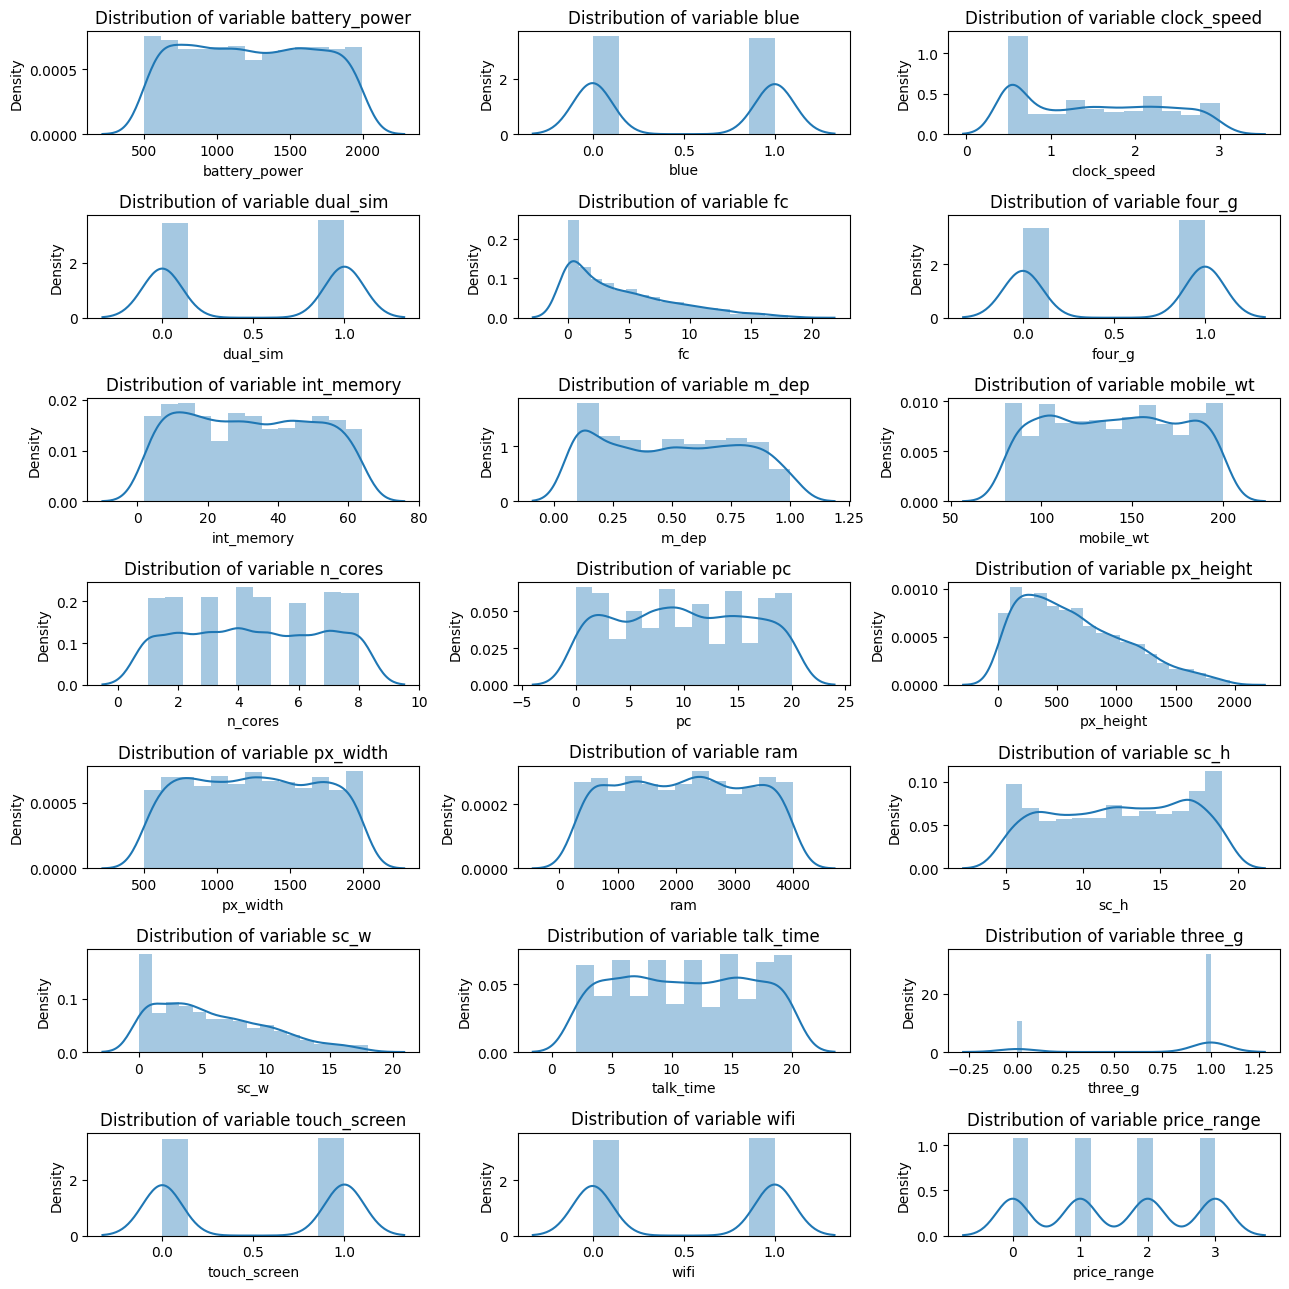

In [6]:
r = 7
c = 3

plt.figure(figsize=(13, 13))

for i, column in enumerate(mobile_df.columns):
    plt.subplot(r, c, i+1)
    dis_dist = sns.distplot(mobile_df[column])
    dis_dist.set_title(f'Distribution of variable {column}')  

plt.tight_layout() 
plt.show()

# 3. Splitting the Dataset

- Division into sets:
    - For modelers (70%) - X_modelling, y_modelling
    - For validators (30%) - X_validating, y_validating

- Splitting the modeler's dataset into:
    - Training set (70%) - X_train, y_train
    - Validation set (20%) - X_val, y_val
    - Test set (10%) - X_test, y_test

In [7]:
X = mobile_df.iloc[:, 0:-1]
y = mobile_df.iloc[:, -1]
X_modelling, X_validating, y_modelling, y_validating = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

print(X_modelling.shape)
print(y_modelling.shape)

print(X_validating.shape)
print(y_validating.shape)

(1400, 20)
(1400,)
(600, 20)
(600,)


Saving separate CSV files for modelers and validators

In [10]:
modelling_df = pd.concat([X_modelling, y_modelling], axis=1)
modelling_df.to_csv('../../Data/Data_modelling/mobile_modelling.csv', index=False)

validating_df = pd.concat([X_validating, y_validating], axis=1)
validating_df.to_csv('../../Data/Data_validating/mobile_validating.csv', index=False)

OSError: Cannot save file into a non-existent directory: '..\..\Data\Data_modelling'


Splitting the dataset for modelers into training, validation, and test sets

In [11]:
X_train, X_val, y_train, y_val = train_test_split(
    X_modelling, y_modelling, stratify=y_modelling, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, stratify=y_val, test_size=0.3, random_state=42
)

print(X_train.shape)
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)

print(X_test.shape)
print(y_test.shape)

(980, 20)
(980,)
(294, 20)
(294,)
(126, 20)
(126,)


# 4. Analysis of values and dependencies in the dataset

### Continuous variables

distribution of values in different columns depending on the prize range. Analysing every single column in groups depending on values range, as to provide clear plots. This way we can analyse how different columns depend on the prize range.

!!!!KOD NIŻEJ MOŻNA SPRÓBOWAĆ USPRYTNIĆ, JAKAŚ PĘTLA OR STH !!!!!
!! TAM W OSTATNIM COŚ ŚWIRUJE I RYSUJE SIĘ PRIZE RANGE ALE JAKOŚ NIE MG TEGO NAPRAWIĆ !!

In [13]:
columns_binary = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
all_columns = mobile_df.columns

selected_columns = [col for col in all_columns if col not in columns_binary]
non_binary_df = mobile_df[selected_columns]

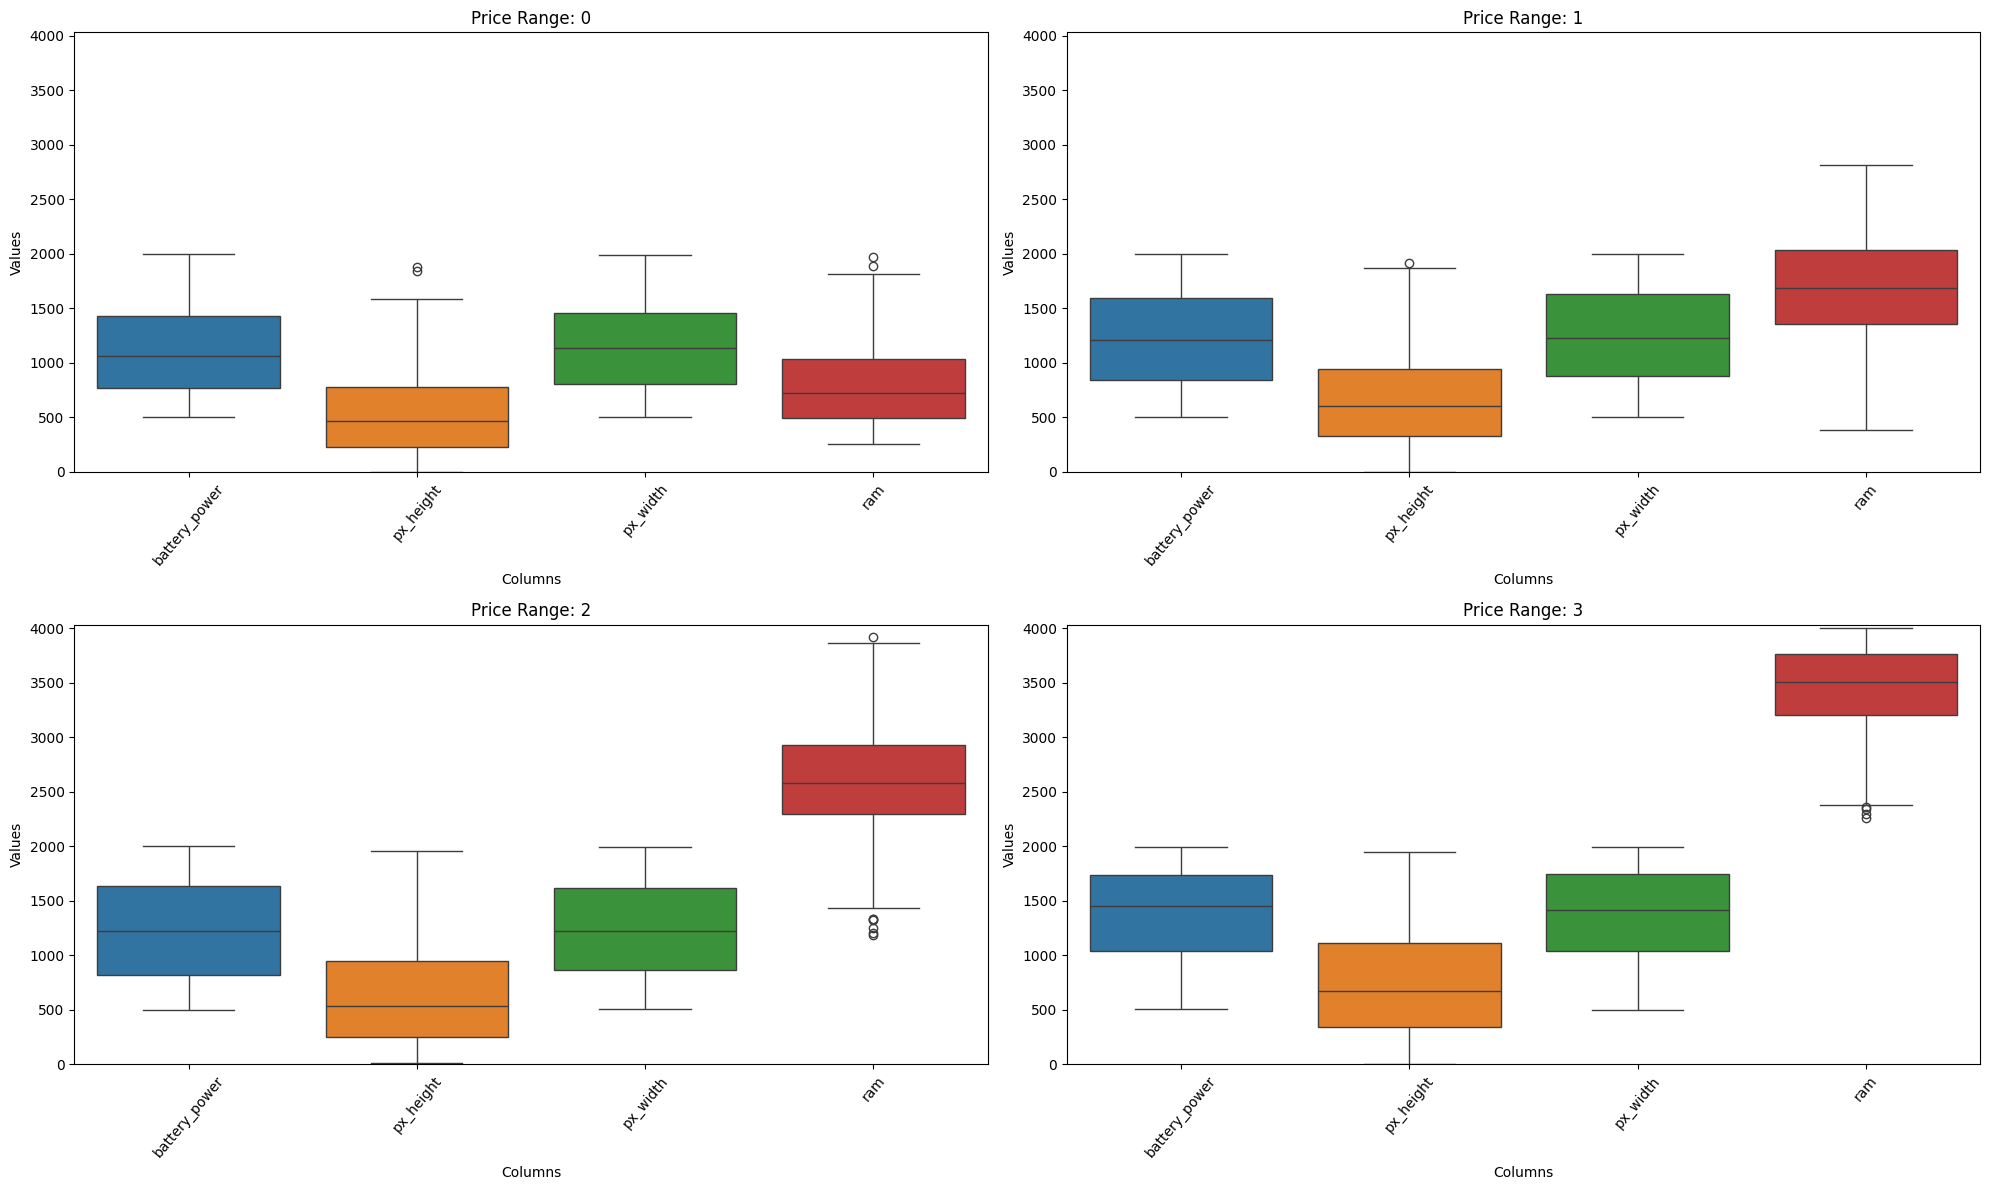

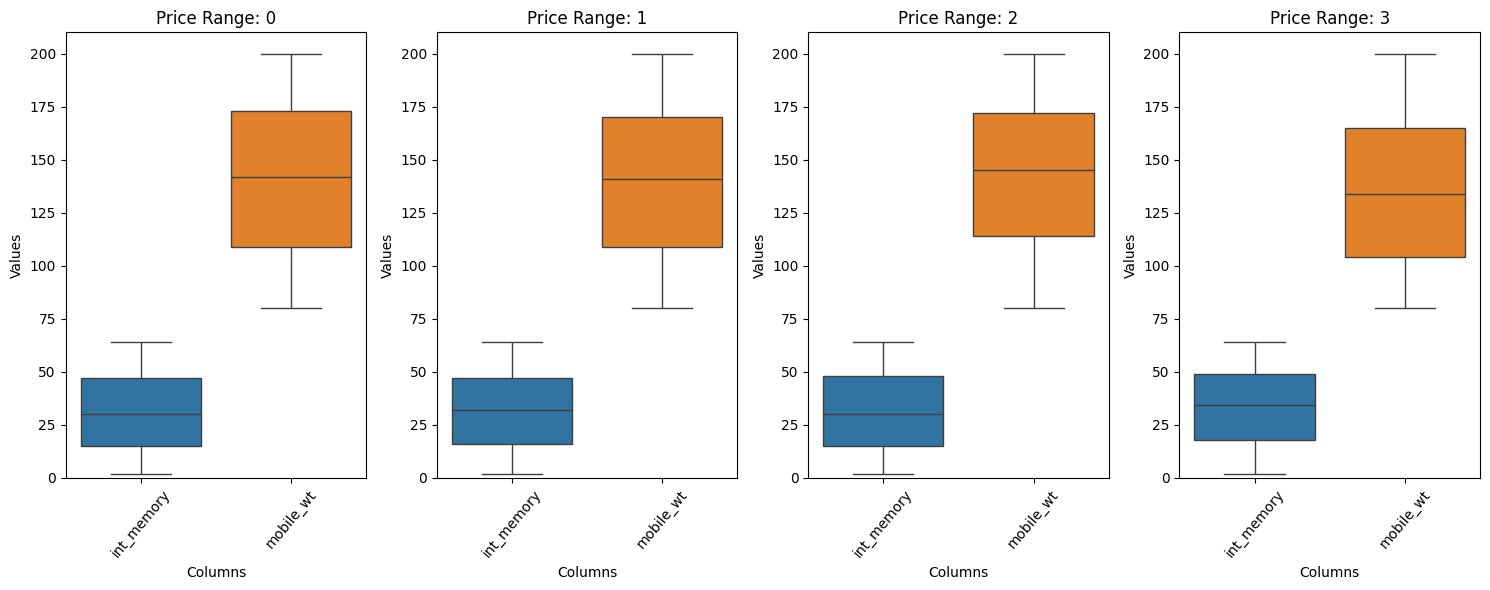

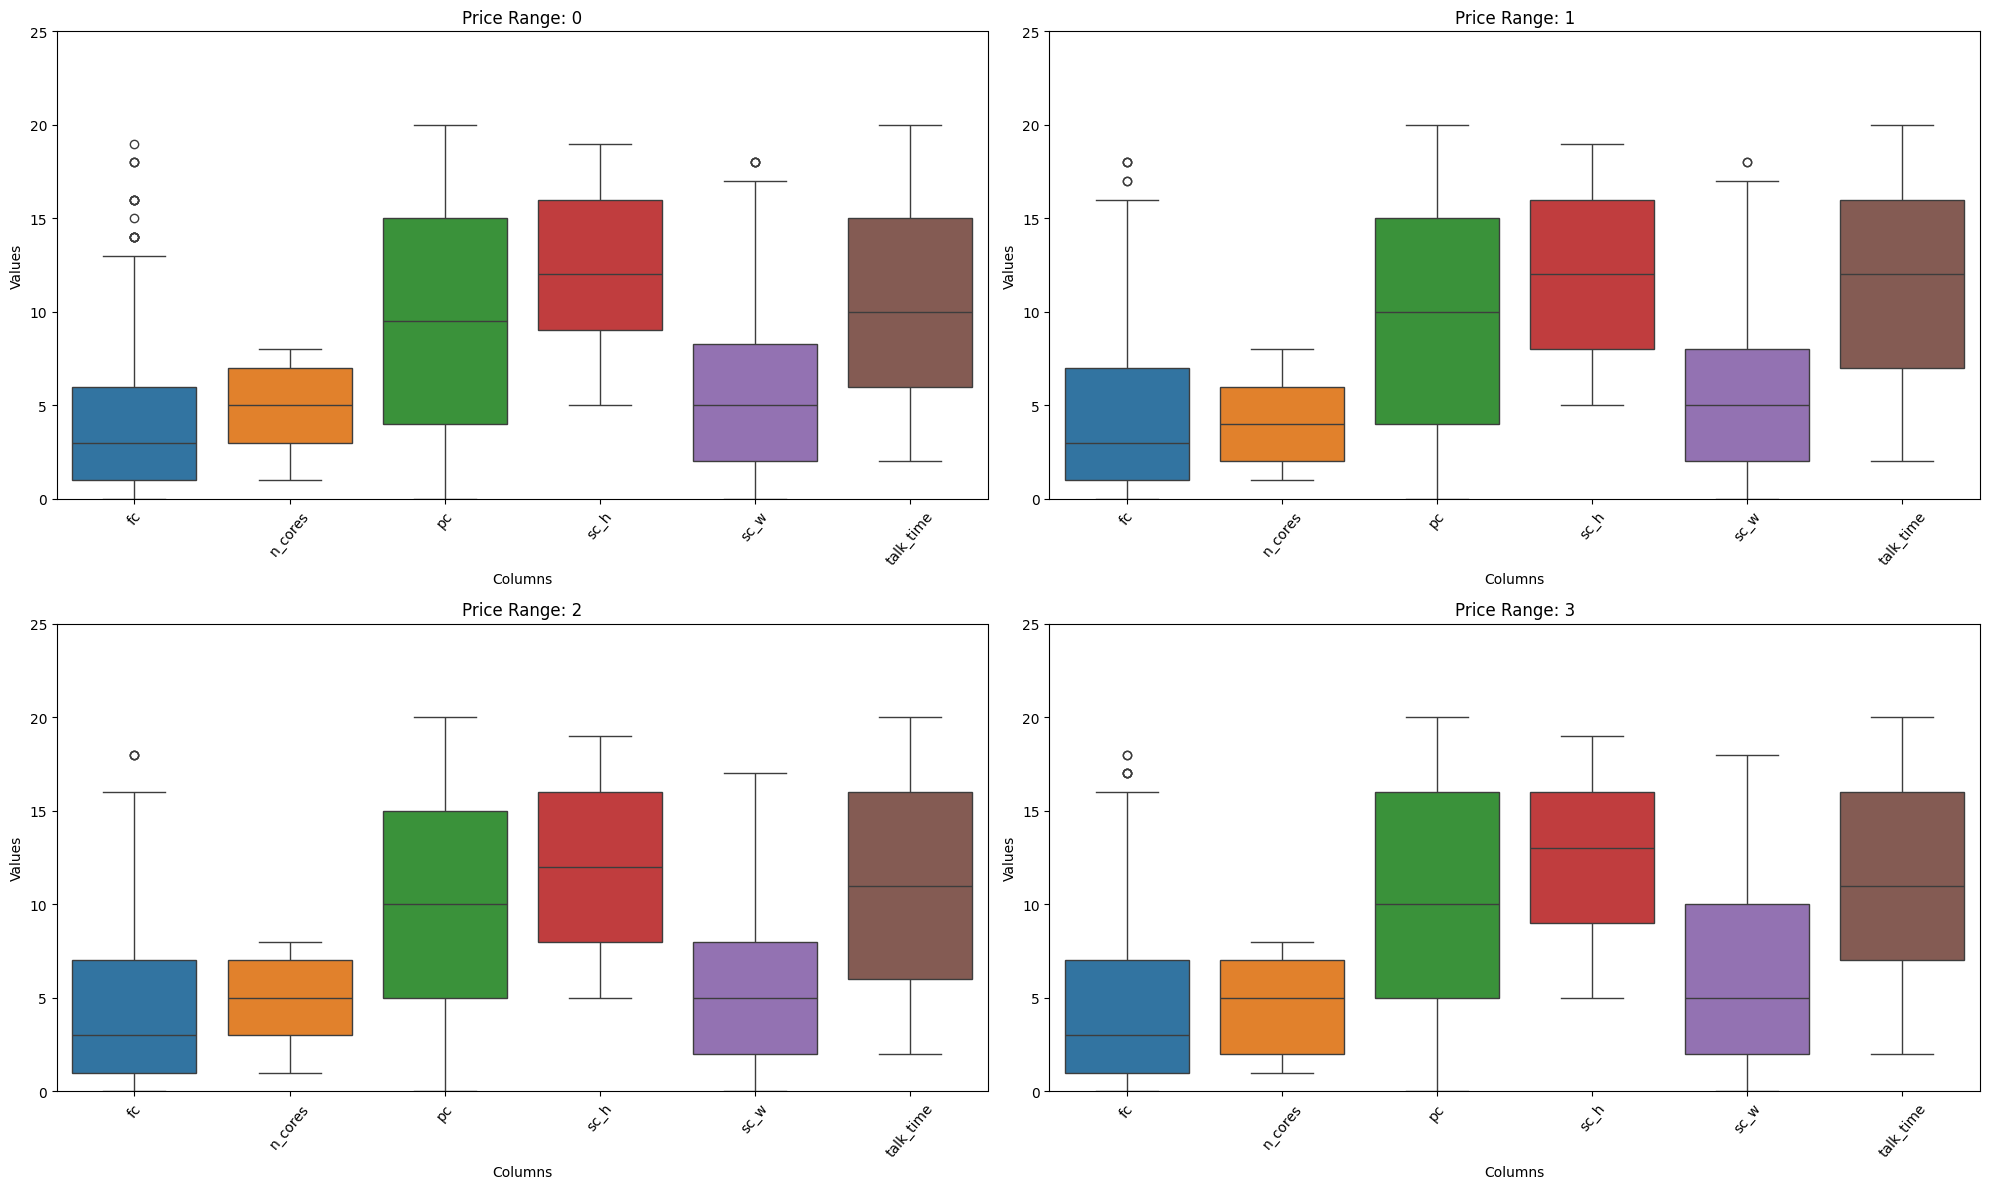

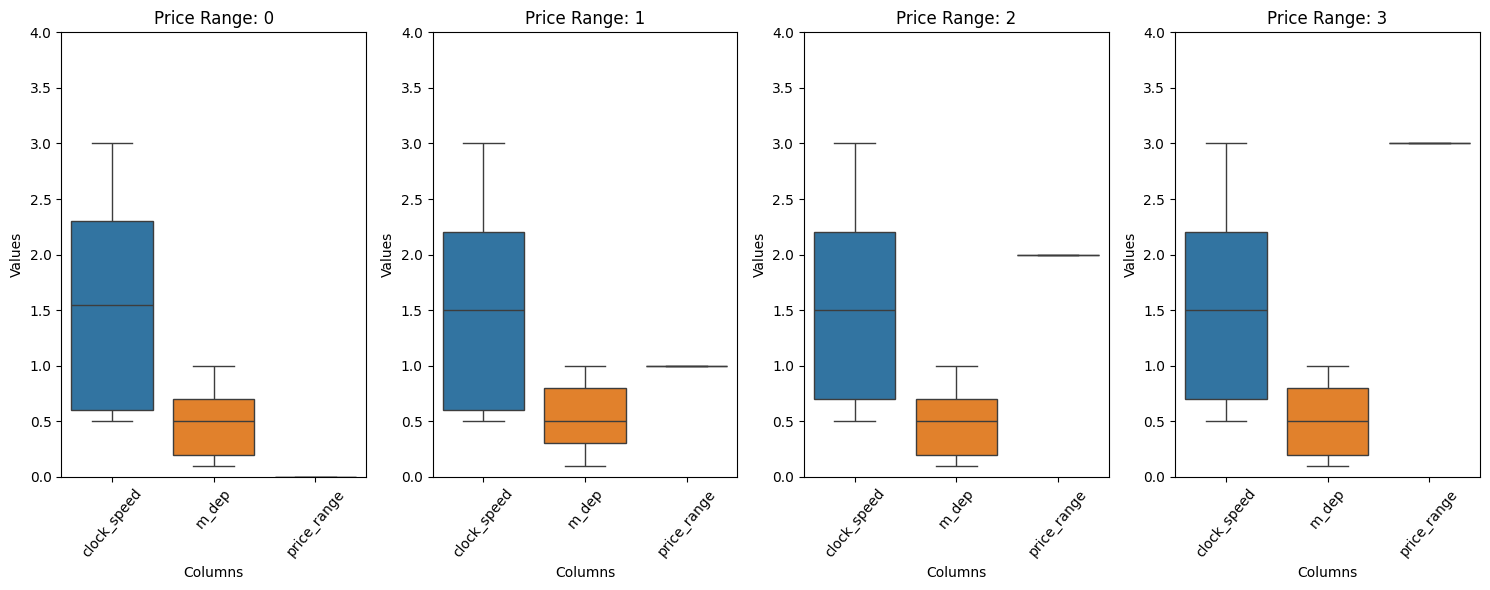

In [14]:
price_ranges = [0, 1, 2, 3]
excluded_columns = [col for col in mobile_df.columns if mobile_df[col].max() <= 200 and col != 'price_range']
filtered_big = mobile_df[[col for col in mobile_df.columns if col not in excluded_columns]]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

for i, price_range in enumerate(price_ranges):
    row = i // 2
    col = i % 2
    
    filtered_df = filtered_big[filtered_big['price_range'] == price_range]
    filtered_df = filtered_df.drop(columns=['price_range'])
    
    sns.boxplot(data=filtered_df, ax=axes[row, col])
    axes[row, col].set_title(f'Price Range: {price_range}')
    axes[row, col].set_ylabel('Values')
    axes[row, col].set_xlabel('Columns')
    axes[row, col].set_ylim(0, 4030)
    axes[row, col].tick_params(axis='x', rotation=50)

plt.tight_layout()
plt.show()

excluded_columns = [col for col in non_binary_df.columns if (non_binary_df[col].max() > 200) or (non_binary_df[col].max() < 50)]
filtered_big = mobile_df[[col for col in non_binary_df.columns if col not in excluded_columns]]


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))

for i, price_range in enumerate(price_ranges):
    row = 0
    col = price_range
    
    filtered_df = filtered_big[mobile_df['price_range'] == price_range]
    
    sns.boxplot(data=filtered_df, ax=axes[col])
    axes[col].set_title(f'Price Range: {price_range}')
    axes[col].set_ylabel('Values')
    axes[col].set_xlabel('Columns')
    axes[col].set_ylim(0, 210)
    axes[col].tick_params(axis='x', rotation=50)

plt.tight_layout()
plt.show()

excluded_columns = [col for col in non_binary_df.columns if (non_binary_df[col].max() <= 5) or (non_binary_df[col].max() >= 50)]
filtered_big = mobile_df[[col for col in non_binary_df.columns if col not in excluded_columns]]


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

for i, price_range in enumerate(price_ranges):
    row = i // 2
    col = i % 2
    
    filtered_df = filtered_big[mobile_df['price_range'] == price_range]
    
    sns.boxplot(data=filtered_df, ax=axes[row, col])
    axes[row, col].set_title(f'Price Range: {price_range}')
    axes[row, col].set_ylabel('Values')
    axes[row, col].set_xlabel('Columns')
    axes[row, col].set_ylim(0, 25)
    axes[row, col].tick_params(axis='x', rotation=50)

plt.tight_layout()
plt.show()

excluded_columns = [col for col in non_binary_df.columns if non_binary_df[col].max() > 5]
filtered_big = mobile_df[[col for col in non_binary_df.columns if col not in excluded_columns]]


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))

for i, price_range in enumerate(price_ranges):
    row = 0
    col = price_range
    
    filtered_df = filtered_big[mobile_df['price_range'] == price_range]
    
    sns.boxplot(data=filtered_df, ax=axes[col])
    axes[col].set_title(f'Price Range: {price_range}')
    axes[col].set_ylabel('Values')
    axes[col].set_xlabel('Columns')
    axes[col].set_ylim(0, 4)
    axes[col].tick_params(axis='x', rotation=50)

plt.tight_layout()
plt.show()

correlation matrix

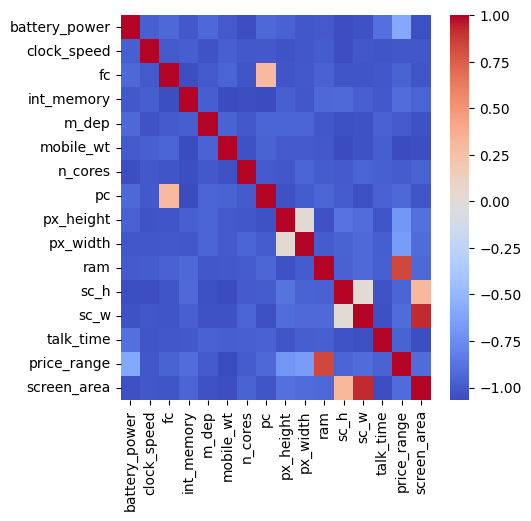

In [31]:
non_binary_df['screen_area'] = non_binary_df['sc_h'] * non_binary_df['sc_w']

corr = non_binary_df.corr()
corr_scaled = 2 * corr - 1

plt.figure(figsize=(5, 5))
sns.heatmap(corr_scaled, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()

In the context of continuous variables, the price_range depends mostly on the *ram* variable, but also on *battery_power,* *px_height*, and *px_width*.

We also observe correlations with other variables, such as:
- *pc* and *fc*
- *px_height* and *px_width*
- *sc_h* and *sc_w*
- *talk_time* and *battery_power*

### Analysing categorical variables

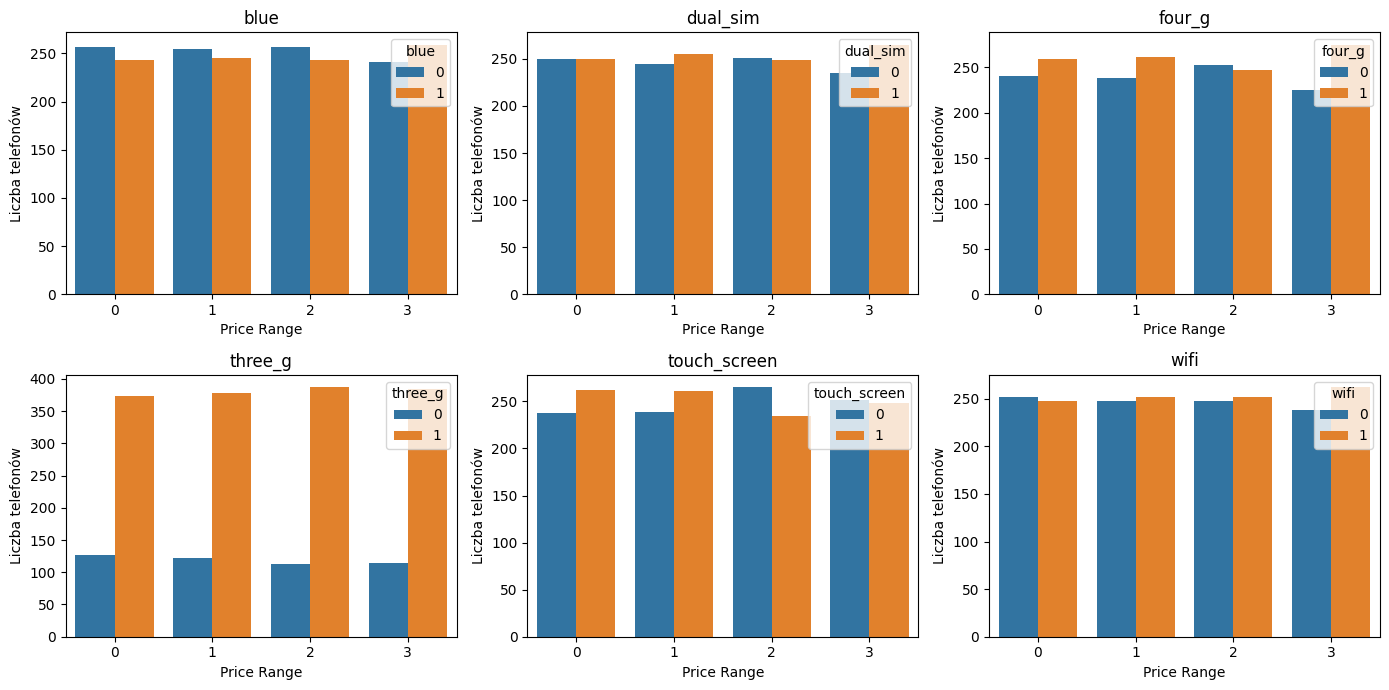

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 7))

for i in range(2):
    for j in range(3):
        column_index = i * 3 + j
        if column_index < len(columns_binary):
            column = columns_binary[column_index]
            sns.countplot(x='price_range', hue=column, data=mobile_df, ax=axes[i, j])
            axes[i, j].set_title(f'{column}')
            axes[i, j].set_xlabel('Price Range')
            axes[i, j].set_ylabel('Liczba telefonów')
        else:
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()

Looking at categorical variables we can say that for almost all categories number of phones with or without above features is simillar for all price ranges.
Small changes and variations we can observe:
- *bluetooth* - for price range equal 3 we can see some difference; it is the only price range where there are more phones with bluetooth than without it 
- *four_g* - we can say that when it comes to price range equal 3 phones with this 4G feature are more likely to be in that group
- *touch_screen* - kind of surprising but phones with touch screen are more likely to be in price range 0 and 1, while those without it in prince range 2 and 3

Even though we can observe some variations, differences in numbers are pretty small for all features mentioned above.

### Analysing screen area, not only height and width

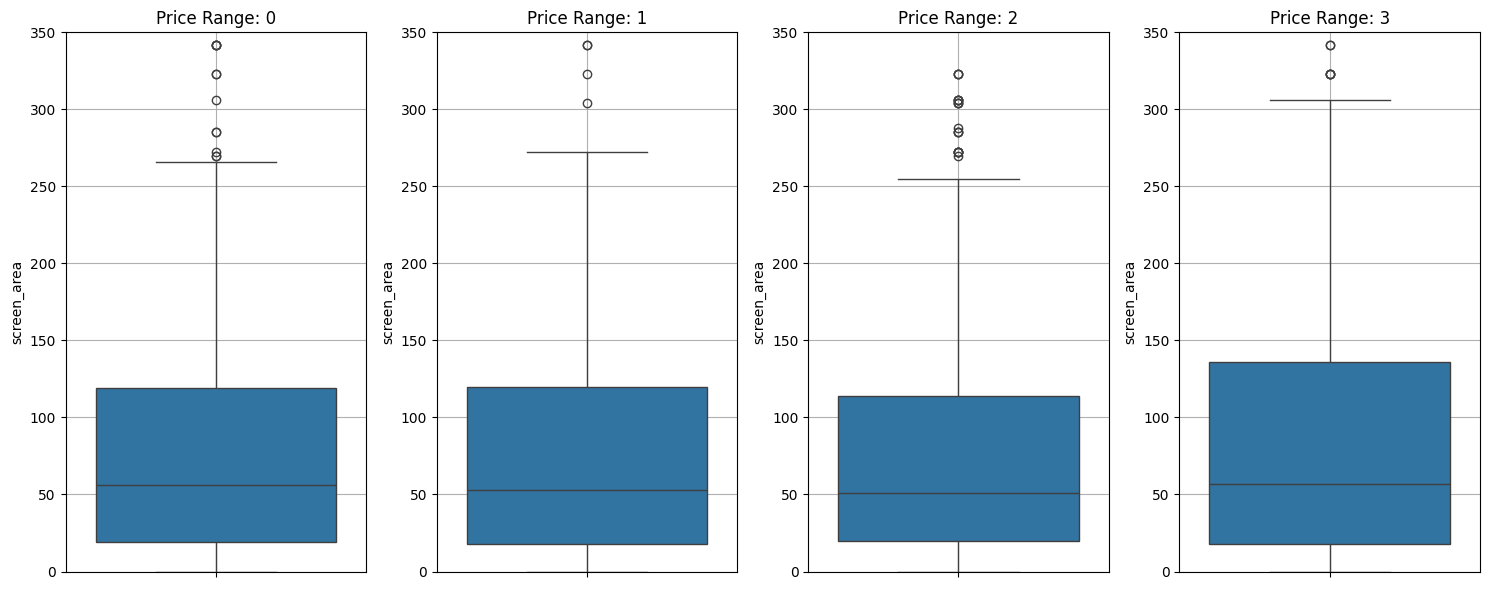

In [29]:
# let's add new column descriging screen area and check if we can see something interesting 
mobile_df['screen_area'] = mobile_df['sc_h'] * mobile_df['sc_w']

# Utwórz siatkę subplotów
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))

# Iteruj po wartościach 'price_range' i rysuj boxploty dla każdej kolumny
for i, price_range in enumerate(price_ranges):
    row = 0
    col = price_range
    
    # Filtruj ramkę danych dla danej wartości 'price_range'
    filtered_df = mobile_df[mobile_df['price_range'] == price_range]
    
    # Rysuj boxplot dla danej wartości 'price_range'
    sns.boxplot(y='screen_area', data=filtered_df, ax=axes[col])
    axes[col].set_title(f'Price Range: {price_range}')
    axes[col].grid(True)
    axes[col].set_ylim(0, 350)
    
plt.tight_layout()
plt.show()


# 5. Conclusion

Features that we would consider predicting Price Range:
- *ram* - makes the biggest difference
- *battery_power*
- *sc_h* / *sc_w* -> *screen_area*